In [7]:
import cv2
import numpy as np

def activar_canales(imagen, color):
    imagen_modificada = imagen.copy()
    
    if color == 1:
        imagen_modificada[:, :, 1] = 0  
        imagen_modificada[:, :, 2] = 0  
    
    elif color == 2:
        imagen_modificada[:, :, 0] = 0  
        imagen_modificada[:, :, 2] = 0  
    
    elif color == 3:
        imagen_modificada[:, :, 0] = 0  
        imagen_modificada[:, :, 1] = 0  
    
    elif color == 10:
        imagen_modificada[:, :, 0] = 0 
    
    elif color == 20:
        imagen_modificada[:, :, 2] = 0  
    
    elif color == 30:
        imagen_modificada[:, :, 1] = 0  
    
    return imagen_modificada

In [11]:
import cv2
import numpy as np

imagen_azul = cv2.imread('imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
imagen_rojo = cv2.imread('imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
imagen_verde = cv2.imread('imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)

if imagen_azul.shape != imagen_rojo.shape or imagen_rojo.shape != imagen_verde.shape:
    raise ValueError("Las imágenes deben tener las mismas dimensiones")

imagen_color = np.zeros((imagen_azul.shape[0], imagen_azul.shape[1], 3), dtype=np.uint8)

imagen_color[:, :, 0] = imagen_azul  
imagen_color[:, :, 1] = imagen_verde  
imagen_color[:, :, 2] = imagen_rojo 

cv2.imwrite('imagen_reconstruida.png', imagen_color)

cv2.imshow('Imagen Reconstruida', imagen_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
def escala_grises_3d(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen1 = imagen_gris.copy()
    imagen2 = imagen_gris.copy()
    imagen3 = imagen_gris.copy()
    
    return imagen1, imagen2, imagen3

imagen = cv2.imread('problema 3.jpg')  
imagen1, imagen2, imagen3 = escala_grises_3d(imagen)
cv2.imshow('Imagen 1', imagen1)
cv2.imshow('Imagen 2', imagen2)
cv2.imshow('Imagen 3', imagen3)
cv2.waitKey(0)
cv2.destroyAllWindows()


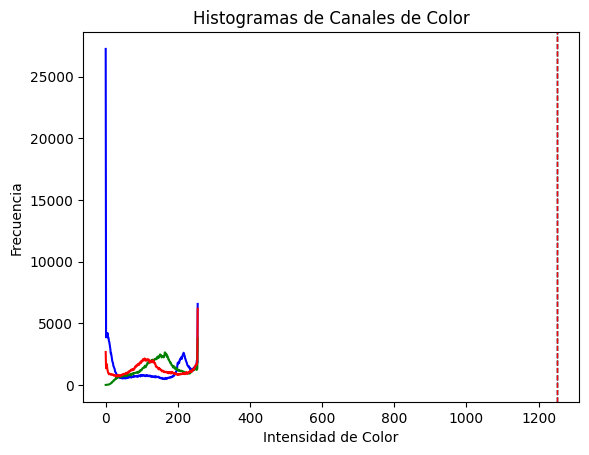

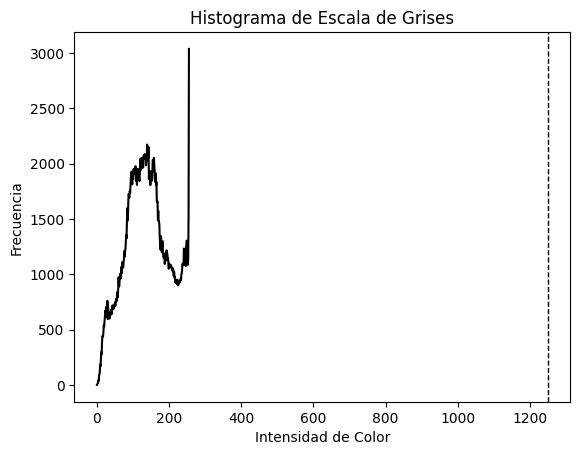

In [13]:
import matplotlib.pyplot as plt

def mostrar_histogramas(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    colores = ('b', 'g', 'r')
    for i, color in enumerate(colores):
        hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.axvline(x=np.mean(hist), color=color, linestyle='dashed', linewidth=1)
    plt.title('Histogramas de Canales de Color')
    plt.xlabel('Intensidad de Color')
    plt.ylabel('Frecuencia')
    plt.show()
    
    hist_gris = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])
    plt.plot(hist_gris, color='k')
    plt.axvline(x=np.mean(hist_gris), color='k', linestyle='dashed', linewidth=1)
    plt.title('Histograma de Escala de Grises')
    plt.xlabel('Intensidad de Color')
    plt.ylabel('Frecuencia')
    plt.show()

imagen = cv2.imread('problema 3.jpg') 
mostrar_histogramas(imagen)


In [14]:
def escala_grises_ponderada(imagen):
    coeficientes = [0.299, 0.587, 0.114]
    imagen_gris = np.dot(imagen[..., :3], coeficientes)
    return imagen_gris.astype(np.uint8)

imagen = cv2.imread('problema 3.jpg')
imagen_gris_ponderada = escala_grises_ponderada(imagen)
cv2.imshow('Imagen en Escala de Grises Ponderada', imagen_gris_ponderada)
cv2.waitKey(0)
cv2.destroyAllWindows()


El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que describe los colores en términos de su tono (H), saturación (S) y valor (V).

- Hue: Representa el color puro y se mide en grados en un círculo de color (0° a 360°). Por ejemplo, 0° es rojo, 120° es verde y 240° es azul.
- Saturation: Representa la pureza del color, desde el gris (0%) hasta el color puro (100%).
- Value: Representa el brillo del color, desde el negro (0%) hasta el máximo brillo del color (100%).

Este espacio de color es útil en muchos procesos de visión por computadora porque separa la información de color (tono) de la intensidad (valor), lo cual es beneficioso para tareas como la detección y el seguimiento de objetos bajo diferentes condiciones de iluminación.